<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/05_Pet_Breeds/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 27.1MB/s 
     |████████████████████████████████| 204kB 50.9MB/s 
     |████████████████████████████████| 1.2MB 47.5MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
#hide
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
(path/'images').ls()[0]

Path('images/shiba_inu_79.jpg')

In [ ]:
fname = (path/'images').ls()[0]
fname

Path('images/shiba_inu_79.jpg')

In [ ]:
re.findall(r'(.+)_\d+.jpg',fname.name)

['shiba_inu']

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

#BASELINE

In [ ]:
#Baseline
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(21)

epoch,train_loss,valid_loss,error_rate,time
0,1.457404,0.313791,0.100812,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.447311,0.258424,0.079838,01:10
1,0.332303,0.242307,0.076455,01:11
2,0.276141,0.271085,0.087280,01:11
3,0.265817,0.289270,0.091340,01:11
4,0.238389,0.297061,0.085927,01:11
5,0.209096,0.329860,0.092016,01:11
6,0.197988,0.315809,0.100812,01:12
7,0.157938,0.285131,0.080514,01:11
8,0.154189,0.288824,0.083897,01:11
9,0.118407,0.327545,0.075101,01:12


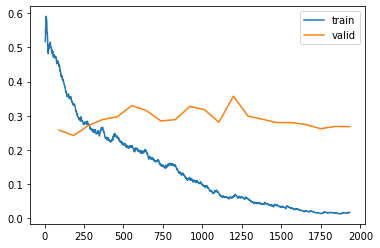

In [ ]:
learn.recorder.plot_loss()

#LR Search

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


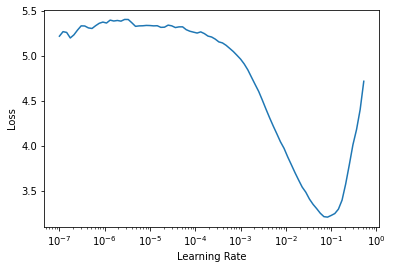

In [ ]:
#Find a good lr and train again
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
#Min is (lr for smallest loss)/ and steep the point the one with higher gradient
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 3.02e-03


In [ ]:
#Take a lr smaller than steepest
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(21, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.356840,0.300390,0.102842,01:53


epoch,train_loss,valid_loss,error_rate,time
0,0.429641,0.221176,0.075778,02:26
1,0.326058,0.234780,0.078484,02:26
2,0.284854,0.233227,0.073748,02:26
3,0.259209,0.347071,0.100135,02:26
4,0.290832,0.337407,0.094723,02:26
5,0.295829,0.354322,0.103518,02:26
6,0.282549,0.461046,0.122463,02:26
7,0.225695,0.407159,0.102842,02:26
8,0.176647,0.411233,0.102842,02:26
9,0.157266,0.369463,0.100812,02:26


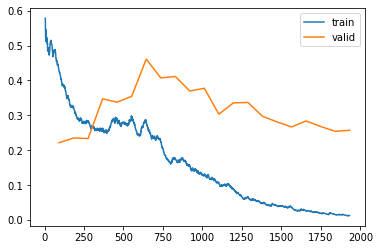

In [ ]:
learn.recorder.plot_loss()

#Unfreeze

In [ ]:
#We have calculated best lr with the old layers of resnet34 freeze
#but fine_tune train once with the layers freezed and the num of epochs unfreeze
#Lets calculate new lr

In [ ]:
#First one cycle before we unfreeze
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.176154,0.309106,0.102165,01:53
1,0.535097,0.243447,0.078484,01:53
2,0.324522,0.196554,0.066982,01:52


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=2.0892961401841602e-06, lr_steep=2.75422871709452e-06)

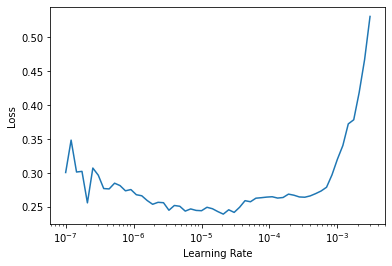

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.262394,0.199029,0.068336,02:26
1,0.261125,0.196307,0.069689,02:26
2,0.250707,0.188564,0.065629,02:26
3,0.236384,0.184253,0.062246,02:27
4,0.217095,0.183399,0.060893,02:26
5,0.193020,0.174025,0.059540,02:26
6,0.180987,0.170581,0.059540,02:26
7,0.177979,0.170845,0.058863,02:26
8,0.159546,0.162977,0.056157,02:26
9,0.142827,0.163992,0.054804,02:26


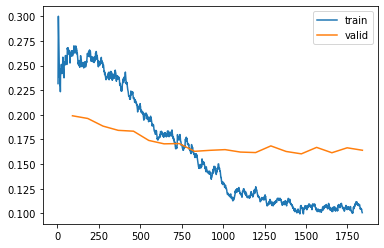

In [ ]:
learn.recorder.plot_loss()

#Discriminative LR

In [ ]:
#When a slice of lr is passed to a learner takes the first for the first layer
#and the last for the las. The ones in between will take values multiplicatively equidistant

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(20, lr_max=slice(1e-6,1e-4))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.160319,0.279121,0.094046,01:07
1,0.532213,0.216696,0.074425,01:06
2,0.312145,0.194858,0.066982,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.277230,0.195433,0.067659,01:11
1,0.267373,0.188451,0.060893,01:11
2,0.247111,0.179673,0.056157,01:11
3,0.238859,0.176332,0.060217,01:11
4,0.224526,0.178905,0.060893,01:11
5,0.208015,0.176193,0.060217,01:12
6,0.188978,0.180009,0.060217,01:11
7,0.168712,0.180820,0.060217,01:11
8,0.157566,0.176416,0.058187,01:12
9,0.132508,0.166477,0.056157,01:12


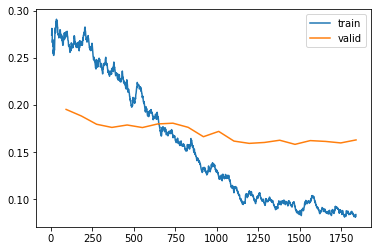

In [ ]:
learn.recorder.plot_loss()

#Experiment

In [26]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0020892962347716093)

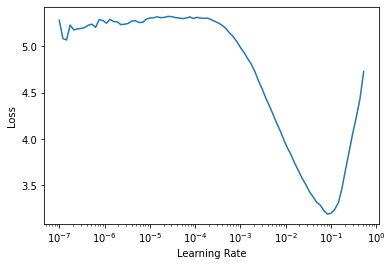

In [7]:
learn.lr_find()

https://fastai1.fast.ai/callbacks.one_cycle.html#The-1cycle-policy

In [27]:
learn.fit_one_cycle(3, lr_max=slice(1e-3,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.158436,0.290417,0.092016,01:08
1,0.517700,0.246937,0.083897,01:07
2,0.319948,0.210447,0.069012,01:07


SuggestedLRs(lr_min=1.737800812406931e-06, lr_steep=9.12010818865383e-07)

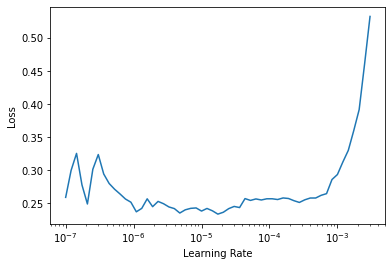

In [28]:
learn.unfreeze()
learn.lr_find()

In [24]:
learn.fit_one_cycle(20, lr_max=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.259409,0.235971,0.071042,01:12
1,0.270199,0.232771,0.066982,01:12
2,0.254858,0.231041,0.066306,01:12
3,0.249668,0.227111,0.065629,01:12
4,0.239026,0.219484,0.064953,01:13
5,0.226563,0.217118,0.064953,01:13
6,0.220927,0.214477,0.066306,01:13
7,0.224517,0.212480,0.063599,01:13
8,0.199499,0.211340,0.064276,01:14
9,0.196992,0.212275,0.058187,01:13


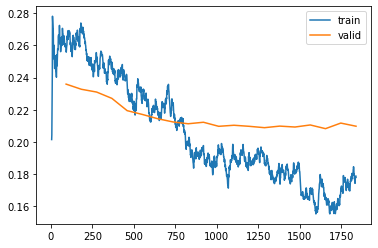

In [25]:
learn.recorder.plot_loss()